In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__)) 

TensorFlow version: 2.1.0


In [2]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter03/Dataset/auto-mpg.data")

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
dataset = dataset.dropna()

In [5]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

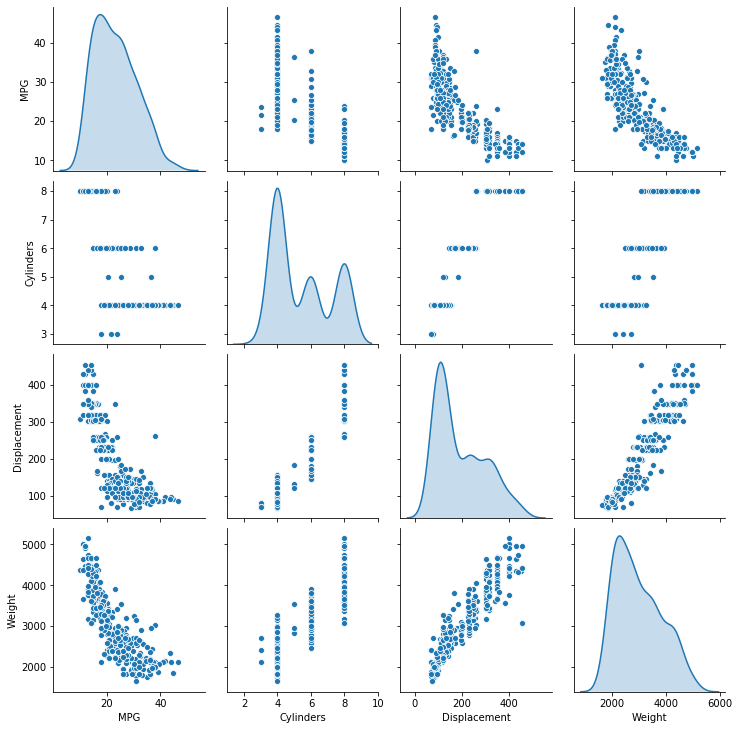

In [7]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [8]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [9]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [10]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 1000

history = model.fit(normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.2, verbose=2)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 1s - loss: 573.3816 - mae: 22.6956 - mse: 573.3816 - val_loss: 556.0357 - val_mae: 22.3060 - val_mse: 556.0356
Epoch 2/1000
251/251 - 0s - loss: 507.2962 - mae: 21.2697 - mse: 507.2962 - val_loss: 491.9144 - val_mae: 20.8811 - val_mse: 491.9144
Epoch 3/1000
251/251 - 0s - loss: 450.4673 - mae: 19.9335 - mse: 450.4673 - val_loss: 430.3919 - val_mae: 19.4100 - val_mse: 430.3919
Epoch 4/1000
251/251 - 0s - loss: 393.5969 - mae: 18.5236 - mse: 393.5969 - val_loss: 368.1741 - val_mae: 17.8027 - val_mse: 368.1741
Epoch 5/1000
251/251 - 0s - loss: 335.4987 - mae: 16.9574 - mse: 335.4987 - val_loss: 304.9691 - val_mae: 16.0169 - val_mse: 304.9691
Epoch 6/1000
251/251 - 0s - loss: 277.0838 - mae: 15.2342 - mse: 277.0838 - val_loss: 243.1573 - val_mae: 14.0708 - val_mse: 243.1573
Epoch 7/1000
251/251 - 0s - loss: 220.5122 - mae: 13.3656 - mse: 220.5122 - val_loss: 185.3308 - val_mae: 12.0455 - val_mse: 185.3308
Epoch 8/1000
251/

251/251 - 0s - loss: 6.4329 - mae: 1.8016 - mse: 6.4329 - val_loss: 8.6072 - val_mae: 2.1913 - val_mse: 8.6072
Epoch 66/1000
251/251 - 0s - loss: 6.5764 - mae: 1.8144 - mse: 6.5764 - val_loss: 8.5111 - val_mae: 2.1926 - val_mse: 8.5111
Epoch 67/1000
251/251 - 0s - loss: 6.2992 - mae: 1.8124 - mse: 6.2992 - val_loss: 8.4440 - val_mae: 2.2402 - val_mse: 8.4440
Epoch 68/1000
251/251 - 0s - loss: 6.5870 - mae: 1.8057 - mse: 6.5870 - val_loss: 8.4317 - val_mae: 2.1949 - val_mse: 8.4317
Epoch 69/1000
251/251 - 0s - loss: 6.4470 - mae: 1.7995 - mse: 6.4470 - val_loss: 8.3582 - val_mae: 2.1699 - val_mse: 8.3582
Epoch 70/1000
251/251 - 0s - loss: 6.3456 - mae: 1.8031 - mse: 6.3456 - val_loss: 8.3650 - val_mae: 2.2672 - val_mse: 8.3650
Epoch 71/1000
251/251 - 0s - loss: 6.4223 - mae: 1.7996 - mse: 6.4223 - val_loss: 8.2883 - val_mae: 2.2130 - val_mse: 8.2883
Epoch 72/1000
251/251 - 0s - loss: 6.3984 - mae: 1.7835 - mse: 6.3984 - val_loss: 8.3512 - val_mae: 2.2154 - val_mse: 8.3512
Epoch 73/1000


Epoch 131/1000
251/251 - 0s - loss: 5.7922 - mae: 1.6535 - mse: 5.7922 - val_loss: 8.0544 - val_mae: 2.2243 - val_mse: 8.0544
Epoch 132/1000
251/251 - 0s - loss: 5.5614 - mae: 1.6411 - mse: 5.5614 - val_loss: 8.1595 - val_mae: 2.1283 - val_mse: 8.1595
Epoch 133/1000
251/251 - 0s - loss: 5.5229 - mae: 1.6355 - mse: 5.5229 - val_loss: 7.9150 - val_mae: 2.1721 - val_mse: 7.9150
Epoch 134/1000
251/251 - 0s - loss: 5.6892 - mae: 1.6519 - mse: 5.6892 - val_loss: 7.8988 - val_mae: 2.1887 - val_mse: 7.8988
Epoch 135/1000
251/251 - 0s - loss: 5.3588 - mae: 1.6005 - mse: 5.3588 - val_loss: 7.9244 - val_mae: 2.2187 - val_mse: 7.9244
Epoch 136/1000
251/251 - 0s - loss: 5.5195 - mae: 1.6211 - mse: 5.5195 - val_loss: 7.9058 - val_mae: 2.2068 - val_mse: 7.9058
Epoch 137/1000
251/251 - 0s - loss: 5.5821 - mae: 1.6291 - mse: 5.5821 - val_loss: 8.0212 - val_mae: 2.0990 - val_mse: 8.0212
Epoch 138/1000
251/251 - 0s - loss: 5.5246 - mae: 1.6505 - mse: 5.5246 - val_loss: 8.0069 - val_mae: 2.1362 - val_mse:

251/251 - 0s - loss: 5.0713 - mae: 1.5425 - mse: 5.0713 - val_loss: 8.0237 - val_mae: 2.1703 - val_mse: 8.0237
Epoch 197/1000
251/251 - 0s - loss: 5.1146 - mae: 1.5394 - mse: 5.1146 - val_loss: 8.2878 - val_mae: 2.2271 - val_mse: 8.2878
Epoch 198/1000
251/251 - 0s - loss: 4.9921 - mae: 1.5336 - mse: 4.9921 - val_loss: 8.2376 - val_mae: 2.1903 - val_mse: 8.2376
Epoch 199/1000
251/251 - 0s - loss: 5.0299 - mae: 1.5356 - mse: 5.0299 - val_loss: 8.2590 - val_mae: 2.2443 - val_mse: 8.2590
Epoch 200/1000
251/251 - 0s - loss: 5.2289 - mae: 1.5475 - mse: 5.2289 - val_loss: 8.2574 - val_mae: 2.1687 - val_mse: 8.2574
Epoch 201/1000
251/251 - 0s - loss: 5.0516 - mae: 1.5268 - mse: 5.0516 - val_loss: 8.3601 - val_mae: 2.1251 - val_mse: 8.3601
Epoch 202/1000
251/251 - 0s - loss: 5.0993 - mae: 1.5649 - mse: 5.0993 - val_loss: 8.1773 - val_mae: 2.1878 - val_mse: 8.1773
Epoch 203/1000
251/251 - 0s - loss: 4.9961 - mae: 1.5275 - mse: 4.9961 - val_loss: 8.2624 - val_mae: 2.2111 - val_mse: 8.2624
Epoch 2

Epoch 262/1000
251/251 - 0s - loss: 4.6579 - mae: 1.4530 - mse: 4.6579 - val_loss: 8.4985 - val_mae: 2.2424 - val_mse: 8.4985
Epoch 263/1000
251/251 - 0s - loss: 4.5834 - mae: 1.4626 - mse: 4.5834 - val_loss: 8.4056 - val_mae: 2.2942 - val_mse: 8.4056
Epoch 264/1000
251/251 - 0s - loss: 4.7584 - mae: 1.4747 - mse: 4.7584 - val_loss: 8.5656 - val_mae: 2.1850 - val_mse: 8.5656
Epoch 265/1000
251/251 - 0s - loss: 4.5370 - mae: 1.4272 - mse: 4.5370 - val_loss: 8.7716 - val_mae: 2.2006 - val_mse: 8.7716
Epoch 266/1000
251/251 - 0s - loss: 4.5299 - mae: 1.4279 - mse: 4.5299 - val_loss: 8.6947 - val_mae: 2.1879 - val_mse: 8.6947
Epoch 267/1000
251/251 - 0s - loss: 4.5141 - mae: 1.4488 - mse: 4.5141 - val_loss: 8.6044 - val_mae: 2.3544 - val_mse: 8.6044
Epoch 268/1000
251/251 - 0s - loss: 4.5913 - mae: 1.4483 - mse: 4.5913 - val_loss: 9.0167 - val_mae: 2.4169 - val_mse: 9.0167
Epoch 269/1000
251/251 - 0s - loss: 4.6659 - mae: 1.4476 - mse: 4.6659 - val_loss: 8.4125 - val_mae: 2.2225 - val_mse:

251/251 - 0s - loss: 4.3085 - mae: 1.4094 - mse: 4.3085 - val_loss: 8.7622 - val_mae: 2.3358 - val_mse: 8.7622
Epoch 328/1000
251/251 - 0s - loss: 4.4812 - mae: 1.3971 - mse: 4.4812 - val_loss: 8.8897 - val_mae: 2.2471 - val_mse: 8.8897
Epoch 329/1000
251/251 - 0s - loss: 4.1599 - mae: 1.3688 - mse: 4.1599 - val_loss: 8.7276 - val_mae: 2.2106 - val_mse: 8.7276
Epoch 330/1000
251/251 - 0s - loss: 4.4505 - mae: 1.4364 - mse: 4.4505 - val_loss: 8.8062 - val_mae: 2.3096 - val_mse: 8.8062
Epoch 331/1000
251/251 - 0s - loss: 4.1942 - mae: 1.3867 - mse: 4.1942 - val_loss: 8.9389 - val_mae: 2.3436 - val_mse: 8.9389
Epoch 332/1000
251/251 - 0s - loss: 4.4482 - mae: 1.3801 - mse: 4.4482 - val_loss: 9.0872 - val_mae: 2.2849 - val_mse: 9.0872
Epoch 333/1000
251/251 - 0s - loss: 4.1464 - mae: 1.3896 - mse: 4.1464 - val_loss: 8.2959 - val_mae: 2.2372 - val_mse: 8.2959
Epoch 334/1000
251/251 - 0s - loss: 4.2242 - mae: 1.3592 - mse: 4.2242 - val_loss: 8.4439 - val_mae: 2.2838 - val_mse: 8.4439
Epoch 3

Epoch 393/1000
251/251 - 0s - loss: 3.9418 - mae: 1.3064 - mse: 3.9418 - val_loss: 9.1917 - val_mae: 2.2609 - val_mse: 9.1917
Epoch 394/1000
251/251 - 0s - loss: 3.9463 - mae: 1.3320 - mse: 3.9463 - val_loss: 8.7575 - val_mae: 2.2890 - val_mse: 8.7575
Epoch 395/1000
251/251 - 0s - loss: 3.9555 - mae: 1.3237 - mse: 3.9555 - val_loss: 8.7958 - val_mae: 2.3366 - val_mse: 8.7958
Epoch 396/1000
251/251 - 0s - loss: 3.9499 - mae: 1.3169 - mse: 3.9499 - val_loss: 9.0752 - val_mae: 2.2402 - val_mse: 9.0752
Epoch 397/1000
251/251 - 0s - loss: 3.8841 - mae: 1.3382 - mse: 3.8841 - val_loss: 9.0530 - val_mae: 2.2661 - val_mse: 9.0530
Epoch 398/1000
251/251 - 0s - loss: 3.9052 - mae: 1.3230 - mse: 3.9052 - val_loss: 8.8151 - val_mae: 2.2679 - val_mse: 8.8151
Epoch 399/1000
251/251 - 0s - loss: 3.8674 - mae: 1.3080 - mse: 3.8674 - val_loss: 8.8181 - val_mae: 2.2261 - val_mse: 8.8181
Epoch 400/1000
251/251 - 0s - loss: 4.0479 - mae: 1.4067 - mse: 4.0479 - val_loss: 8.9319 - val_mae: 2.3567 - val_mse:

251/251 - 0s - loss: 3.6877 - mae: 1.2882 - mse: 3.6877 - val_loss: 9.5881 - val_mae: 2.3237 - val_mse: 9.5881
Epoch 459/1000
251/251 - 0s - loss: 3.5349 - mae: 1.2431 - mse: 3.5349 - val_loss: 8.8929 - val_mae: 2.2904 - val_mse: 8.8929
Epoch 460/1000
251/251 - 0s - loss: 3.6016 - mae: 1.2365 - mse: 3.6016 - val_loss: 10.2601 - val_mae: 2.3829 - val_mse: 10.2601
Epoch 461/1000
251/251 - 0s - loss: 3.6463 - mae: 1.2949 - mse: 3.6463 - val_loss: 9.2828 - val_mae: 2.3901 - val_mse: 9.2828
Epoch 462/1000
251/251 - 0s - loss: 3.7851 - mae: 1.3002 - mse: 3.7851 - val_loss: 9.0242 - val_mae: 2.2797 - val_mse: 9.0242
Epoch 463/1000
251/251 - 0s - loss: 3.6920 - mae: 1.2876 - mse: 3.6920 - val_loss: 8.9567 - val_mae: 2.2855 - val_mse: 8.9567
Epoch 464/1000
251/251 - 0s - loss: 3.4347 - mae: 1.2294 - mse: 3.4347 - val_loss: 9.4515 - val_mae: 2.2885 - val_mse: 9.4515
Epoch 465/1000
251/251 - 0s - loss: 3.7144 - mae: 1.3005 - mse: 3.7144 - val_loss: 9.4723 - val_mae: 2.3906 - val_mse: 9.4723
Epoch

Epoch 524/1000
251/251 - 0s - loss: 3.3723 - mae: 1.2110 - mse: 3.3723 - val_loss: 10.3185 - val_mae: 2.3711 - val_mse: 10.3185
Epoch 525/1000
251/251 - 0s - loss: 3.4381 - mae: 1.2604 - mse: 3.4381 - val_loss: 9.0789 - val_mae: 2.3596 - val_mse: 9.0789
Epoch 526/1000
251/251 - 0s - loss: 3.4945 - mae: 1.2291 - mse: 3.4945 - val_loss: 8.8763 - val_mae: 2.3508 - val_mse: 8.8763
Epoch 527/1000
251/251 - 0s - loss: 3.2121 - mae: 1.1919 - mse: 3.2121 - val_loss: 8.7812 - val_mae: 2.3298 - val_mse: 8.7812
Epoch 528/1000
251/251 - 0s - loss: 3.4111 - mae: 1.2454 - mse: 3.4111 - val_loss: 9.0464 - val_mae: 2.3875 - val_mse: 9.0464
Epoch 529/1000
251/251 - 0s - loss: 3.2820 - mae: 1.1858 - mse: 3.2820 - val_loss: 8.7495 - val_mae: 2.2810 - val_mse: 8.7495
Epoch 530/1000
251/251 - 0s - loss: 3.3477 - mae: 1.2044 - mse: 3.3477 - val_loss: 9.0032 - val_mae: 2.3160 - val_mse: 9.0032
Epoch 531/1000
251/251 - 0s - loss: 3.5030 - mae: 1.2144 - mse: 3.5030 - val_loss: 8.9210 - val_mae: 2.2790 - val_ms

251/251 - 0s - loss: 2.9641 - mae: 1.1408 - mse: 2.9641 - val_loss: 9.0636 - val_mae: 2.2706 - val_mse: 9.0636
Epoch 590/1000
251/251 - 0s - loss: 3.0647 - mae: 1.1920 - mse: 3.0647 - val_loss: 8.8218 - val_mae: 2.3737 - val_mse: 8.8218
Epoch 591/1000
251/251 - 0s - loss: 3.1851 - mae: 1.1779 - mse: 3.1851 - val_loss: 8.5490 - val_mae: 2.2620 - val_mse: 8.5490
Epoch 592/1000
251/251 - 0s - loss: 3.1421 - mae: 1.1791 - mse: 3.1421 - val_loss: 9.2158 - val_mae: 2.3788 - val_mse: 9.2158
Epoch 593/1000
251/251 - 0s - loss: 3.0215 - mae: 1.1474 - mse: 3.0215 - val_loss: 8.6747 - val_mae: 2.3343 - val_mse: 8.6747
Epoch 594/1000
251/251 - 0s - loss: 3.0182 - mae: 1.1322 - mse: 3.0182 - val_loss: 8.9238 - val_mae: 2.2141 - val_mse: 8.9238
Epoch 595/1000
251/251 - 0s - loss: 3.0398 - mae: 1.1441 - mse: 3.0398 - val_loss: 8.7075 - val_mae: 2.2923 - val_mse: 8.7075
Epoch 596/1000
251/251 - 0s - loss: 3.1543 - mae: 1.1767 - mse: 3.1543 - val_loss: 8.7347 - val_mae: 2.2554 - val_mse: 8.7347
Epoch 5

Epoch 655/1000
251/251 - 0s - loss: 2.7468 - mae: 1.0738 - mse: 2.7468 - val_loss: 9.3366 - val_mae: 2.2810 - val_mse: 9.3366
Epoch 656/1000
251/251 - 0s - loss: 3.0809 - mae: 1.2160 - mse: 3.0809 - val_loss: 8.6832 - val_mae: 2.3255 - val_mse: 8.6832
Epoch 657/1000
251/251 - 0s - loss: 2.7737 - mae: 1.0928 - mse: 2.7737 - val_loss: 8.4672 - val_mae: 2.2629 - val_mse: 8.4672
Epoch 658/1000
251/251 - 0s - loss: 2.8795 - mae: 1.1041 - mse: 2.8795 - val_loss: 8.3685 - val_mae: 2.2803 - val_mse: 8.3685
Epoch 659/1000
251/251 - 0s - loss: 2.7283 - mae: 1.0987 - mse: 2.7283 - val_loss: 8.7679 - val_mae: 2.2187 - val_mse: 8.7679
Epoch 660/1000
251/251 - 0s - loss: 2.9366 - mae: 1.1203 - mse: 2.9366 - val_loss: 8.6214 - val_mae: 2.1932 - val_mse: 8.6214
Epoch 661/1000
251/251 - 0s - loss: 2.8590 - mae: 1.1214 - mse: 2.8590 - val_loss: 8.5445 - val_mae: 2.2270 - val_mse: 8.5445
Epoch 662/1000
251/251 - 0s - loss: 2.7759 - mae: 1.0897 - mse: 2.7759 - val_loss: 8.8514 - val_mae: 2.2117 - val_mse:

Epoch 721/1000
251/251 - 0s - loss: 2.6793 - mae: 1.0253 - mse: 2.6793 - val_loss: 8.4712 - val_mae: 2.2310 - val_mse: 8.4712
Epoch 722/1000
251/251 - 0s - loss: 2.6701 - mae: 1.0912 - mse: 2.6701 - val_loss: 8.5927 - val_mae: 2.2424 - val_mse: 8.5927
Epoch 723/1000
251/251 - 0s - loss: 2.5861 - mae: 1.0746 - mse: 2.5861 - val_loss: 8.8393 - val_mae: 2.1742 - val_mse: 8.8393
Epoch 724/1000
251/251 - 0s - loss: 2.6378 - mae: 1.0433 - mse: 2.6378 - val_loss: 8.4351 - val_mae: 2.1654 - val_mse: 8.4351
Epoch 725/1000
251/251 - 0s - loss: 2.6370 - mae: 1.0436 - mse: 2.6370 - val_loss: 8.7599 - val_mae: 2.1741 - val_mse: 8.7599
Epoch 726/1000
251/251 - 0s - loss: 2.5546 - mae: 1.0675 - mse: 2.5546 - val_loss: 8.8613 - val_mae: 2.3233 - val_mse: 8.8613
Epoch 727/1000
251/251 - 0s - loss: 2.5607 - mae: 1.0649 - mse: 2.5607 - val_loss: 8.6897 - val_mae: 2.1896 - val_mse: 8.6897
Epoch 728/1000
251/251 - 0s - loss: 2.6083 - mae: 1.0632 - mse: 2.6083 - val_loss: 8.4314 - val_mae: 2.1969 - val_mse:

251/251 - 0s - loss: 2.4504 - mae: 1.0148 - mse: 2.4504 - val_loss: 8.4441 - val_mae: 2.2228 - val_mse: 8.4441
Epoch 787/1000
251/251 - 0s - loss: 2.5112 - mae: 1.0497 - mse: 2.5112 - val_loss: 8.7816 - val_mae: 2.2125 - val_mse: 8.7816
Epoch 788/1000
251/251 - 0s - loss: 2.5477 - mae: 1.0460 - mse: 2.5477 - val_loss: 8.8525 - val_mae: 2.2494 - val_mse: 8.8525
Epoch 789/1000
251/251 - 0s - loss: 2.4865 - mae: 1.0354 - mse: 2.4865 - val_loss: 8.6302 - val_mae: 2.2629 - val_mse: 8.6302
Epoch 790/1000
251/251 - 0s - loss: 2.4282 - mae: 1.0269 - mse: 2.4282 - val_loss: 8.7604 - val_mae: 2.3237 - val_mse: 8.7604
Epoch 791/1000
251/251 - 0s - loss: 2.6151 - mae: 1.0771 - mse: 2.6151 - val_loss: 8.4535 - val_mae: 2.1562 - val_mse: 8.4535
Epoch 792/1000
251/251 - 0s - loss: 2.3831 - mae: 1.0219 - mse: 2.3831 - val_loss: 8.6703 - val_mae: 2.2646 - val_mse: 8.6703
Epoch 793/1000
251/251 - 0s - loss: 2.4319 - mae: 1.0179 - mse: 2.4319 - val_loss: 8.9399 - val_mae: 2.3874 - val_mse: 8.9399
Epoch 7

Epoch 852/1000
251/251 - 0s - loss: 2.3046 - mae: 0.9793 - mse: 2.3046 - val_loss: 8.7373 - val_mae: 2.1947 - val_mse: 8.7373
Epoch 853/1000
251/251 - 0s - loss: 2.3063 - mae: 1.0000 - mse: 2.3063 - val_loss: 8.4557 - val_mae: 2.2037 - val_mse: 8.4557
Epoch 854/1000
251/251 - 0s - loss: 2.4980 - mae: 0.9811 - mse: 2.4980 - val_loss: 8.8936 - val_mae: 2.2229 - val_mse: 8.8936
Epoch 855/1000
251/251 - 0s - loss: 2.3825 - mae: 1.0126 - mse: 2.3825 - val_loss: 8.8182 - val_mae: 2.2406 - val_mse: 8.8182
Epoch 856/1000
251/251 - 0s - loss: 2.0403 - mae: 0.9587 - mse: 2.0403 - val_loss: 9.5538 - val_mae: 2.4268 - val_mse: 9.5538
Epoch 857/1000
251/251 - 0s - loss: 2.5324 - mae: 1.0408 - mse: 2.5324 - val_loss: 8.8259 - val_mae: 2.2380 - val_mse: 8.8259
Epoch 858/1000
251/251 - 0s - loss: 2.2462 - mae: 0.9517 - mse: 2.2462 - val_loss: 9.0256 - val_mae: 2.2503 - val_mse: 9.0256
Epoch 859/1000
251/251 - 0s - loss: 2.1344 - mae: 0.9631 - mse: 2.1344 - val_loss: 9.2931 - val_mae: 2.2430 - val_mse:

251/251 - 0s - loss: 2.1622 - mae: 0.9366 - mse: 2.1622 - val_loss: 9.2118 - val_mae: 2.2538 - val_mse: 9.2118
Epoch 918/1000
251/251 - 0s - loss: 2.2621 - mae: 1.0035 - mse: 2.2621 - val_loss: 9.1872 - val_mae: 2.2424 - val_mse: 9.1872
Epoch 919/1000
251/251 - 0s - loss: 2.1335 - mae: 0.9343 - mse: 2.1335 - val_loss: 9.3742 - val_mae: 2.2629 - val_mse: 9.3742
Epoch 920/1000
251/251 - 0s - loss: 1.9683 - mae: 0.9194 - mse: 1.9683 - val_loss: 8.9090 - val_mae: 2.3315 - val_mse: 8.9090
Epoch 921/1000
251/251 - 0s - loss: 2.2257 - mae: 0.9901 - mse: 2.2257 - val_loss: 9.1851 - val_mae: 2.3024 - val_mse: 9.1851
Epoch 922/1000
251/251 - 0s - loss: 2.1514 - mae: 0.9461 - mse: 2.1514 - val_loss: 9.0084 - val_mae: 2.2549 - val_mse: 9.0084
Epoch 923/1000
251/251 - 0s - loss: 2.0683 - mae: 0.9391 - mse: 2.0683 - val_loss: 8.9850 - val_mae: 2.2369 - val_mse: 8.9850
Epoch 924/1000
251/251 - 0s - loss: 2.0640 - mae: 0.9254 - mse: 2.0640 - val_loss: 9.8165 - val_mae: 2.3278 - val_mse: 9.8165
Epoch 9

251/251 - 0s - loss: 2.0205 - mae: 0.9327 - mse: 2.0205 - val_loss: 8.9154 - val_mae: 2.2187 - val_mse: 8.9154
Epoch 983/1000
251/251 - 0s - loss: 1.9932 - mae: 0.9228 - mse: 1.9932 - val_loss: 8.9563 - val_mae: 2.2411 - val_mse: 8.9563
Epoch 984/1000
251/251 - 0s - loss: 2.3961 - mae: 0.9848 - mse: 2.3961 - val_loss: 9.2861 - val_mae: 2.3563 - val_mse: 9.2861
Epoch 985/1000
251/251 - 0s - loss: 2.0911 - mae: 0.9476 - mse: 2.0911 - val_loss: 9.1841 - val_mae: 2.2801 - val_mse: 9.1841
Epoch 986/1000
251/251 - 0s - loss: 1.9359 - mae: 0.8976 - mse: 1.9359 - val_loss: 9.1177 - val_mae: 2.3092 - val_mse: 9.1177
Epoch 987/1000
251/251 - 0s - loss: 2.3648 - mae: 0.9763 - mse: 2.3648 - val_loss: 9.2722 - val_mae: 2.2867 - val_mse: 9.2722
Epoch 988/1000
251/251 - 0s - loss: 1.8681 - mae: 0.8574 - mse: 1.8681 - val_loss: 9.2648 - val_mae: 2.3046 - val_mse: 9.2648
Epoch 989/1000
251/251 - 0s - loss: 2.0015 - mae: 0.9067 - mse: 2.0015 - val_loss: 9.2365 - val_mae: 2.3597 - val_mse: 9.2365
Epoch 9

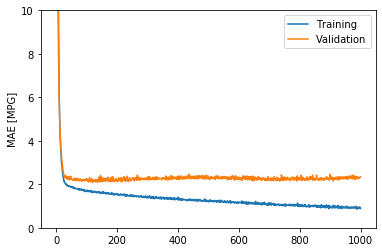

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['epoch'],hist['mae'])
plt.plot(hist['epoch'],hist['val_mae'])
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')
plt.legend(["Training", "Validation"])

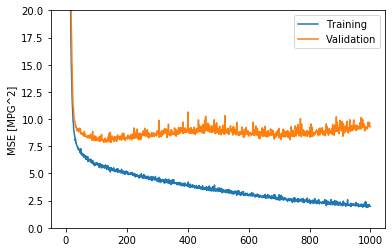

In [13]:
plt.plot(hist['epoch'],hist['mse'])
plt.plot(hist['epoch'],hist['val_mse'])
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')
plt.legend(["Training", "Validation"])

In [14]:
model = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=epochs, validation_split = 0.2, verbose=2, 
                    callbacks=[early_stop])

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 0s - loss: 578.2651 - mae: 22.7891 - mse: 578.2651 - val_loss: 575.4479 - val_mae: 22.6761 - val_mse: 575.4479
Epoch 2/1000
251/251 - 0s - loss: 536.6135 - mae: 21.8435 - mse: 536.6135 - val_loss: 532.3114 - val_mae: 21.6708 - val_mse: 532.3114
Epoch 3/1000
251/251 - 0s - loss: 495.4688 - mae: 20.8617 - mse: 495.4688 - val_loss: 484.6943 - val_mae: 20.5125 - val_mse: 484.6943
Epoch 4/1000
251/251 - 0s - loss: 450.4576 - mae: 19.7450 - mse: 450.4576 - val_loss: 434.3413 - val_mae: 19.2148 - val_mse: 434.3413
Epoch 5/1000
251/251 - 0s - loss: 401.5700 - mae: 18.4462 - mse: 401.5700 - val_loss: 379.7068 - val_mae: 17.7162 - val_mse: 379.7068
Epoch 6/1000
251/251 - 0s - loss: 348.1165 - mae: 16.9505 - mse: 348.1165 - val_loss: 321.0873 - val_mae: 16.0297 - val_mse: 321.0873
Epoch 7/1000
251/251 - 0s - loss: 291.5176 - mae: 15.3141 - mse: 291.5176 - val_loss: 260.4770 - val_mae: 14.2428 - val_mse: 260.4771
Epoch 8/1000
251/

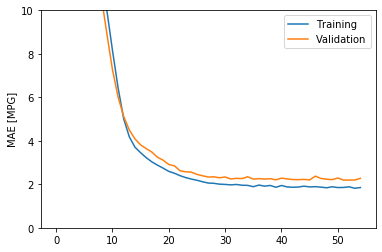

In [15]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch

plt.plot(early_hist['epoch'],early_hist['mae'])
plt.plot(early_hist['epoch'],early_hist['val_mae'])
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')
plt.legend(["Training", "Validation"])

In [16]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.3440 - mae: 1.8722 - mse: 6.3440
Testing set Mean Abs Error:  1.87 MPG


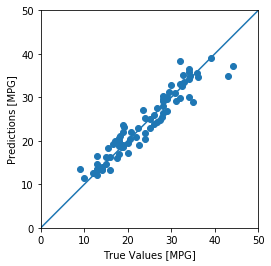

In [17]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
